### Linear regression

- 일반화된 회귀 식 : $\hat{y} = w[0]*x[0] + w[1]*x[1] + ... + w[p]*x[p] + b$

> - **$x[0]$ 부터 $x[p]$ 까지는 하나의 데이터의 각 `feature`를 의미**
- **$w, b$는 모델이 학습 해야 할 `파라미터`**
- **$\hat{y}$는 $y$의 `예측값`이다.**
- **$w$ 값들은 계수(coefficient)이며 $b$는 절편(offset 또는 intercept)이다.**

In [3]:
#필요 라이브러리 임포트
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
import platform
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['axes.unicode_minus'] = False

path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~~')

w[0]: 0.393906  b: -0.031804


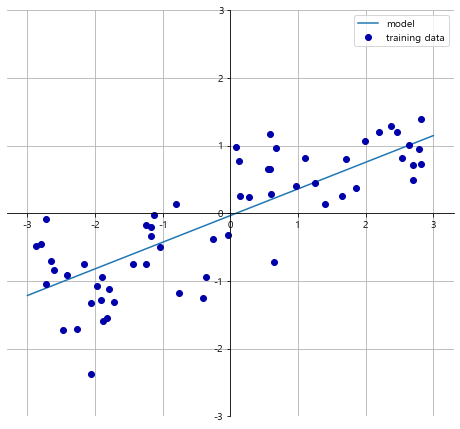

In [2]:
mglearn.plots.plot_linear_regression_wave() # mglearn 샘플 그래프 보기

### 선형 모델

- 회귀를 위한 선형 모델은 다양하다. 
- 각 모델들은 **파라미터 $w, b$를 학습하는 방법**과 **모델의 복잡도를 제어하는 방법**에서 차이가 난다.

#### 1) 선형 회귀(Linear regression)

- **최소 제곱법(OLS, Ordinary Least Squares)**라고도 한다.
- 선형 회귀는 실제 $y$값과 $\hat{y}$의 **평균 제곱 오차(MSE - Mean Squared Error)를 최소화** 하는 모델 파라미터 $w, b$를 찾는 방법으로 움직인다.
    - $ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 $
    - 이를 **$L^2$ norm**을 적용 했다라고 한다.

In [6]:
# 일반화 성능 평가를 위해 기존 데이터를 훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

# 60개의 샘플 데이터 준비
X, y = mglearn.datasets.make_wave(n_samples=60) 
# 훈련, 테스트 데이터셋 준비
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

# 선형 회귀 모델에 훈련
lr = LinearRegression().fit(X_train, y_train) 

In [8]:
print("lr의 계수(weight 또는 cofficient) : {}".format(lr.coef_))
print("lr의 편향(offset 또는 intercept) : {}".format(lr.intercept_))
print()
print("훈련 세트 점수 : {}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수 : {}".format(lr.score(X_test, y_test)))

lr의 계수(weight 또는 cofficient) : [0.39390555]
lr의 편향(offset 또는 intercept) : -0.031804343026759746

훈련 세트 점수 : 0.6700890315075756
테스트 세트 점수 : 0.65933685968637


- $R^2$값이 $66\%$로 높지는 않습니다. 

- 또한 train, test의 score가 비슷한 것을 봤을 때, **과소 적합**으로 볼 수 있습니다.

In [9]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


- train의 $R^2$값이 $95\%$이지만 test의 $R^2$값은 $61\%$로 모델이 **과대 적합**되었다고 볼 수 있습니다.

**모델의 일반화를 위해 복잡도를 제어해야한다.**

**Linear Regression 모델로는 복잡도를 제어 할 수 없다.**

### 릿지(RIdge) 회귀

- 릿지(Ridge)도 회귀 선형 모델로 최소 제곱법과 같은 예측 함수를 사용한다.
- 릿지 회귀에서 **가중치($w$)의 값 중 예측에 영향을 크게 주는 값**에 **`규제`**를 적용한다.
- 규제(regularzation) : **과대 적합이 되지 않도록 모델을 제한한다는 의미**
- 패널티
    - **$L^2$ norm**을 이용한다.
- Ridge 회귀에서 alpha 값을 조절하여 패널티 조정
    - alpha값을 높이면 계수들이 0으로 가까워져 모델이 단순해짐
    - alpha값을 낮추면 모델이 복잡해짐
- **다중공선성 방지**에 가장 많이 사용된다.

In [11]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print('기본 회귀 분석')
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

기본 회귀 분석
훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75


In [13]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('Ridge 회귀 alpha 값 : 10')
print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

Ridge 회귀 alpha 값 : 10
훈련 세트 점수 : 0.79
테스트 세트 점수 : 0.64


In [14]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('Ridge 회귀 alpha 값 : 0.1')
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

Ridge 회귀 alpha 값 : 0.1
훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.77


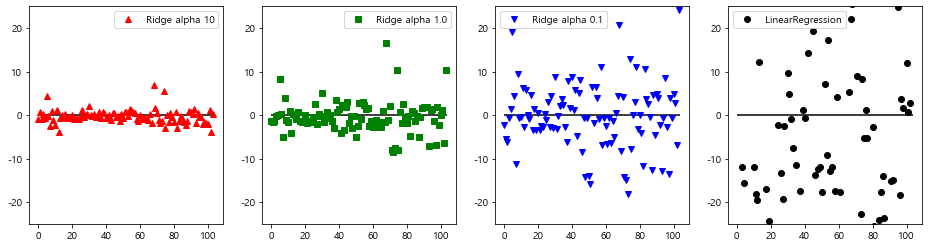

In [36]:
def make_figure(row, col, n=8,m=4):
    n = 4 * col; m = 4 * row
    f, ax = plt.subplots(row, col, figsize = (n,m))
    return f, ax

f, ax = make_figure(1,4)

ax0 = plt.subplot(ax[0])
ax0.plot(ridge10.coef_, '^', label="Ridge alpha 10", c = 'r')
ax0.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

ax1 = plt.subplot(ax[1])
ax1.plot(ridge.coef_, 's', label="Ridge alpha 1.0", c = 'g')
ax1.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

ax2 = plt.subplot(ax[2])
ax2.plot(ridge01.coef_, 'v', label="Ridge alpha 0.1", c = 'b')
ax2.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

ax3 = plt.subplot(ax[3])
ax3.plot(lr.coef_, 'o', label="LinearRegression", c = 'k')
ax3.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

#### alpha 값이 작아질수록 패널티는 작아지므로 계수의 값이 증가하는 것을 볼 수 있다.

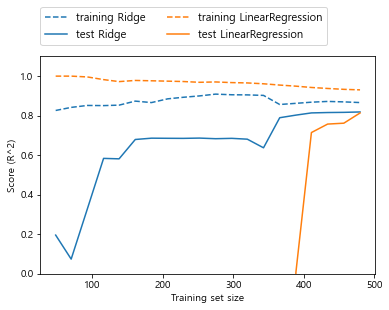

In [37]:
mglearn.plots.plot_ridge_n_samples()

- alpha 값은 1로 고정되어 있고 데이터의 갯수를 조절했을 때 위와 같은 결과가 나온다.
- 결과적으로 **데이터가 충분할 경우 규제 자체는 덜 중요하다**는 것을 볼 수 있다.

### 라쏘(Lasso) 회귀

- 릿지와 비슷하게 계수에 규제를 걸어 계수를 0에 가깝게 한다.
- 릿지 회귀와의 차이점은 **$L^1$ 규제**를 사용하여 **계수 값이 $0$**이 된다.
- 자동으로 feature selection이 된다.

In [38]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성의 수 : 4


In [39]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso001.coef_ != 0)))

훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77
사용한 특성의 수 : 33


In [40]:
lasso0001 = Lasso(alpha=0.0001, max_iter=1000000).fit(X_train, y_train)

print("훈련 세트 점수 : {:.2f}".format(lasso0001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso0001.score(X_test, y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso0001.coef_ != 0)))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.64
사용한 특성의 수 : 96


Text(0, 0.5, '계수 크기')

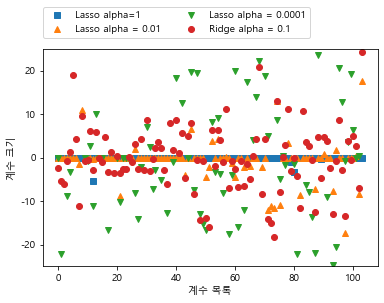

In [41]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha = 0.01")
plt.plot(lasso0001.coef_, 'v', label="Lasso alpha = 0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha = 0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

#### alpha 값이 커질수록 사용되는 계수의 수가 줄어든다.